Get photon loss thresholds for Toric code and BB code lattices under modified RUS with increasing maximum number of repeats.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

#### Load and analyse Toric code data

In [2]:
N_list = range(1,11)
id_list = range(1,11)

l3_data_all = []
l5_data_all = []
l8_data_all = []

for N in N_list:
    l3_data = []
    l5_data = []
    l8_data = []
    l12_data = []
    for id in id_list:
        l3_data.append(np.loadtxt(f"rus_toric_data_MDF/N_{N}_l_loss_{id}.txt")[0])
        l5_data.append(np.loadtxt(f"rus_toric_data_MDF/N_{N}_l_loss_{id}.txt")[1])
        l8_data.append(np.loadtxt(f"rus_toric_data_MDF/N_{N}_l_loss_{id}.txt")[2])
    l3_data_all.append(l3_data)
    l5_data_all.append(l5_data)
    l8_data_all.append(l8_data)
    
tot_num_chunks = 10 # array-jobs (HPC)

l3_loss_rate_all = [] # [0] would be N=1 for example
l5_loss_rate_all = []
l8_loss_rate_all = []

for i in range(len(N_list)):
    l3_loss_rate = [sum(elements)/tot_num_chunks for elements in zip(*l3_data_all[i])]
    l5_loss_rate = [sum(elements)/tot_num_chunks for elements in zip(*l5_data_all[i])]
    l8_loss_rate = [sum(elements)/tot_num_chunks for elements in zip(*l8_data_all[i])]
    
    l3_loss_rate_all.append(l3_loss_rate)
    l5_loss_rate_all.append(l5_loss_rate)
    l8_loss_rate_all.append(l8_loss_rate)

loss_rates_all_codes = np.array([l3_loss_rate_all,l5_loss_rate_all,l8_loss_rate_all])

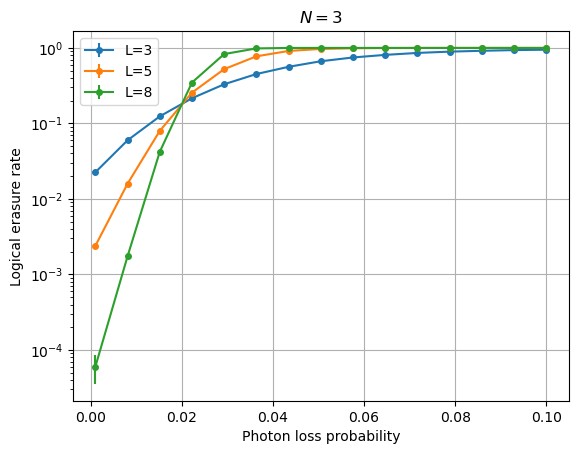

In [3]:
d_codes = [3,5,8]


p_list = np.linspace(0.001, 0.1, 15)
tot_num_trials = 100000

N = 3 

fig2, ax2 = plt.subplots()

for i in range(len(d_codes)):
    # Compute standard errors for all points in p_list
    std_err = np.sqrt(loss_rates_all_codes[i][N-1] * (1 - loss_rates_all_codes[i][N-1]) / tot_num_trials)
    
    # Plot with error bars
    ax2.errorbar(p_list, loss_rates_all_codes[i][N-1],yerr=std_err, fmt='o-',  ms=4, lw=1.5,label=f"L={d_codes[i]}")
ax2.set_yscale('log') 
    
plt.title(rf"$N = {N}$")
ax2.set_xlabel(r'Photon loss probability')
ax2.set_ylabel('Logical erasure rate')
plt.grid()
plt.legend()

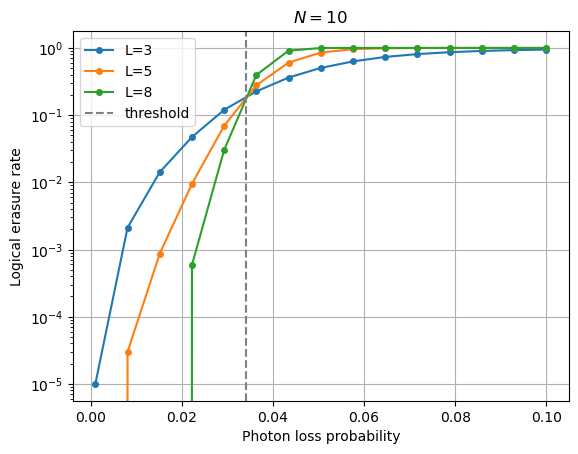

In [5]:
fig2, ax2 = plt.subplots()
for i in range(len(d_codes)):
    ax2.semilogy(p_list, loss_rates_all_codes[i][N-1], 'o-', label=f"L={d_codes[i]}", ms=4, lw=1.5)
    
plt.axvline(0.034, color='grey', linestyle='--', label="threshold") # find threshold by eye

plt.title(rf"$N = {N}$")
ax2.set_xlabel(r'Photon loss probability')
ax2.set_ylabel('Logical erasure rate')
plt.grid()
plt.legend()

C:\Users\wg22320\AppData\Local\Temp\ipykernel_28440\653697207.py:32: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('magma')


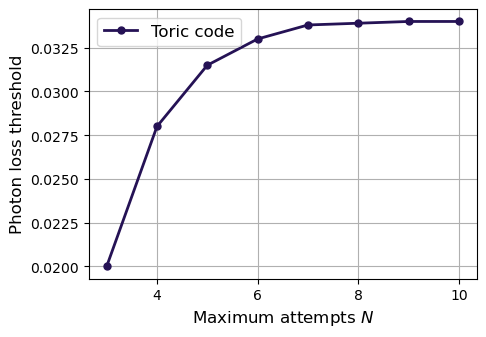

In [75]:
thresholds = [0.02, # N=3
              0.028,
              0.0315,
              0.033,
              0.0338,
              0.0339,
              0.034,
              0.034]

import matplotlib.cm as cm

cmap = cm.get_cmap('magma')

plt.figure(figsize=(5, 3.5))
plt.plot(range(3,11),thresholds,'o-', ms=5, lw=2,label="Toric code",color=cmap(0.15))
plt.grid()
plt.xlabel(r"Maximum attempts $N$",size=12)
plt.ylabel("Photon loss threshold",size=12)
plt.locator_params(axis='x', nbins=5)
plt.locator_params(axis='y', nbins=7)

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(fontsize=12)
# plt.savefig("FIG_RUS_toric.png",bbox_inches='tight', dpi=200)

#### Same for BB code lattices:

In [6]:
N_list = range(1,11)
id_list = range(1,11)

n72_data_all = []
n90_data_all = []
n108_data_all = []
n144_data_all = []

for N in N_list:
    n72_data = []
    n90_data = []
    n108_data = []
    n144_data = []
    
    for id in id_list:

        n72_data.append(np.loadtxt(f"rus_bb_data_MDF/N_{N}_l_loss_{id}.txt")[0])
        n90_data.append(np.loadtxt(f"rus_bb_data_MDF/N_{N}_l_loss_{id}.txt")[1])
        n108_data.append(np.loadtxt(f"rus_bb_data_MDF/N_{N}_l_loss_{id}.txt")[2])
        n144_data.append(np.loadtxt(f"rus_bb_data_MDF/N_{N}_l_loss_{id}.txt")[3])
    
    n72_data_all.append(n72_data)
    n90_data_all.append(n90_data)
    n108_data_all.append(n108_data)
    n144_data_all.append(n144_data)


tot_num_chunks = 20 # 5000 trials per array-job


n72_loss_rate_all = []  
n90_loss_rate_all = []  
n108_loss_rate_all = [] 
n144_loss_rate_all = []  


for i in range(len(N_list)):
    n72_loss_rate = [sum(elements) / tot_num_chunks for elements in zip(*n72_data_all[i])]
    n90_loss_rate = [sum(elements) / tot_num_chunks for elements in zip(*n90_data_all[i])]
    n108_loss_rate = [sum(elements) / tot_num_chunks for elements in zip(*n108_data_all[i])]
    n144_loss_rate = [sum(elements) / tot_num_chunks for elements in zip(*n144_data_all[i])]
    
    n72_loss_rate_all.append(n72_loss_rate)
    n90_loss_rate_all.append(n90_loss_rate)
    n108_loss_rate_all.append(n108_loss_rate)
    n144_loss_rate_all.append(n144_loss_rate)

loss_rates_all_codes = np.array([n72_loss_rate_all, n90_loss_rate_all, n108_loss_rate_all, n144_loss_rate_all])

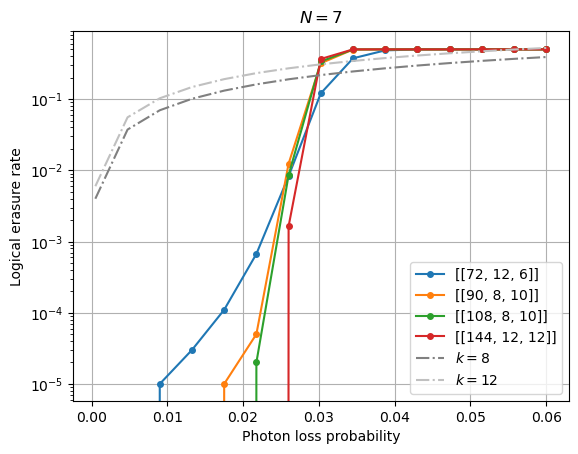

In [77]:
nn_list = [72,90,108,144]
k_list = [12,8,8,12]
d_codes = [6,10,10,12]

p_list = np.linspace(0.0005, 0.06, 15)

N = 7

fig2, ax2 = plt.subplots()
for i in range(len(d_codes)):
    ax2.semilogy(p_list, loss_rates_all_codes[i][N-1], 'o-', label=f"[[{nn_list[i]}, {k_list[i]}, {d_codes[i]}]]", ms=4, lw=1.5)
    
plt.plot(p_list,1-(1-p_list)**8,"-.",color="grey", label=r"$k=8$") # logical = physical error line
plt.plot(p_list, 1-(1-p_list)**12,"-.",color="silver", label=r"$k=12$") # logical = physical error line
plt.title(rf"$N = {N}$")
ax2.set_xlabel(r'Photon loss probability')
ax2.set_ylabel('Logical erasure rate')
plt.grid()
plt.legend()

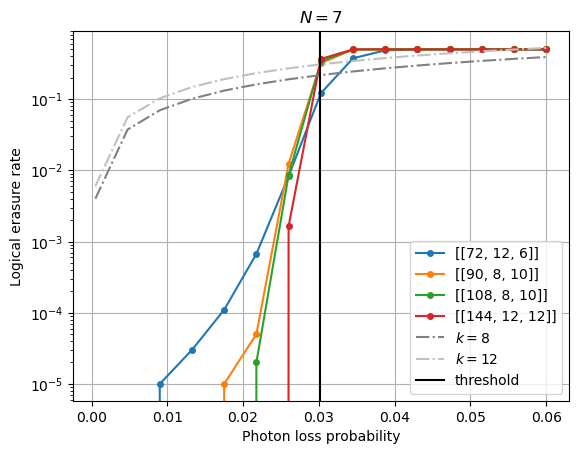

In [82]:
fig2, ax2 = plt.subplots()
for i in range(len(d_codes)):
    ax2.semilogy(p_list, loss_rates_all_codes[i][N-1], 'o-', label=f"[[{nn_list[i]}, {k_list[i]}, {d_codes[i]}]]", ms=4, lw=1.5)
    
plt.plot(p_list,1-(1-p_list)**8,"-.",color="grey", label=r"$k=8$") # logical = physical error line
plt.plot(p_list, 1-(1-p_list)**12,"-.",color="silver", label=r"$k=12$") # logical = physical error line

plt.axvline(0.0302, color='black', linestyle='-', label="threshold") # estimate pseudo-threshold by eye
plt.title(rf"$N = {N}$")
ax2.set_xlabel(r'Photon loss probability')
ax2.set_ylabel('Logical erasure rate')
plt.grid()
plt.legend()

C:\Users\wg22320\AppData\Local\Temp\ipykernel_28440\1785345456.py:37: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('magma')


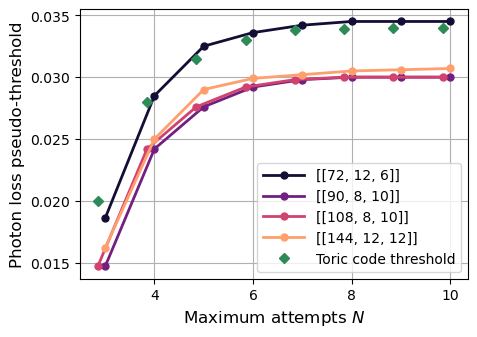

In [94]:
# pseudo-threshold against N plot

pt72 = [0.0186, 0.0285, 0.0325, 0.0336, 0.0342, 0.0345, 0.0345, 0.0345]
pt144 = [0.0162, 0.025, 0.029, 0.0299, 0.0302, 0.0305, 0.0306, 0.0307]
pt90 = [0.0147, 0.0242, 0.0276, 0.0292, 0.0298, 0.03, 0.03, 0.03]
pt108 = [0.0147, 0.0242, 0.0276, 0.0292, 0.0298, 0.03, 0.03, 0.03]

thresholds_standard = [0.0205, # N=3 # standard RUS
                          0.025,
                          0.027,
                          0.028,
                          0.0282,
                          0.0283,
                          0.0284,
                          0.0285]

pt = [pt72,pt90,pt108,pt144]
plt.figure(figsize=(5, 3.5))
cmap = cm.get_cmap('magma')
colors_list = [cmap(i) for i in np.linspace(0.1, 0.8, 4)] 
for i in range(4):
    if i in [0,1,3]:
        plt.plot(range(3,11),pt[i],'o-', ms=5, lw=2,label=f"[[{nn_list[i]}, {k_list[i]}, {d_codes[i]}]]", color=colors_list[i])
        
    elif i == 2:
        plt.plot(np.arange(3,11)-0.15, pt[i],'o-', ms=5, lw=2,label=f"[[{nn_list[i]}, {k_list[i]}, {d_codes[i]}]]", color=colors_list[i])
    
plt.grid()
from matplotlib.legend_handler import HandlerLine2D
line, =plt.plot(np.arange(3,11)-0.15,thresholds,'D', ms=5, lw=2,label="Toric code threshold",color="seagreen")

plt.xlabel(r"Maximum attempts $N$",size=12)
plt.ylabel("Photon loss pseudo-threshold",size=12)
plt.locator_params(axis='x', nbins=5)
plt.locator_params(axis='y', nbins=7)

plt.legend(handler_map={line: HandlerLine2D(numpoints=1)}, handlelength=3)
# plt.savefig("FIG_RUS_BB_NEW.png",bbox_inches='tight', dpi=200)